##### Phase 3: Unsupervised Learning
#####    Dataset: Iris Species Dataset


Step-1 Importing Libraries and loading dataset

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa
Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


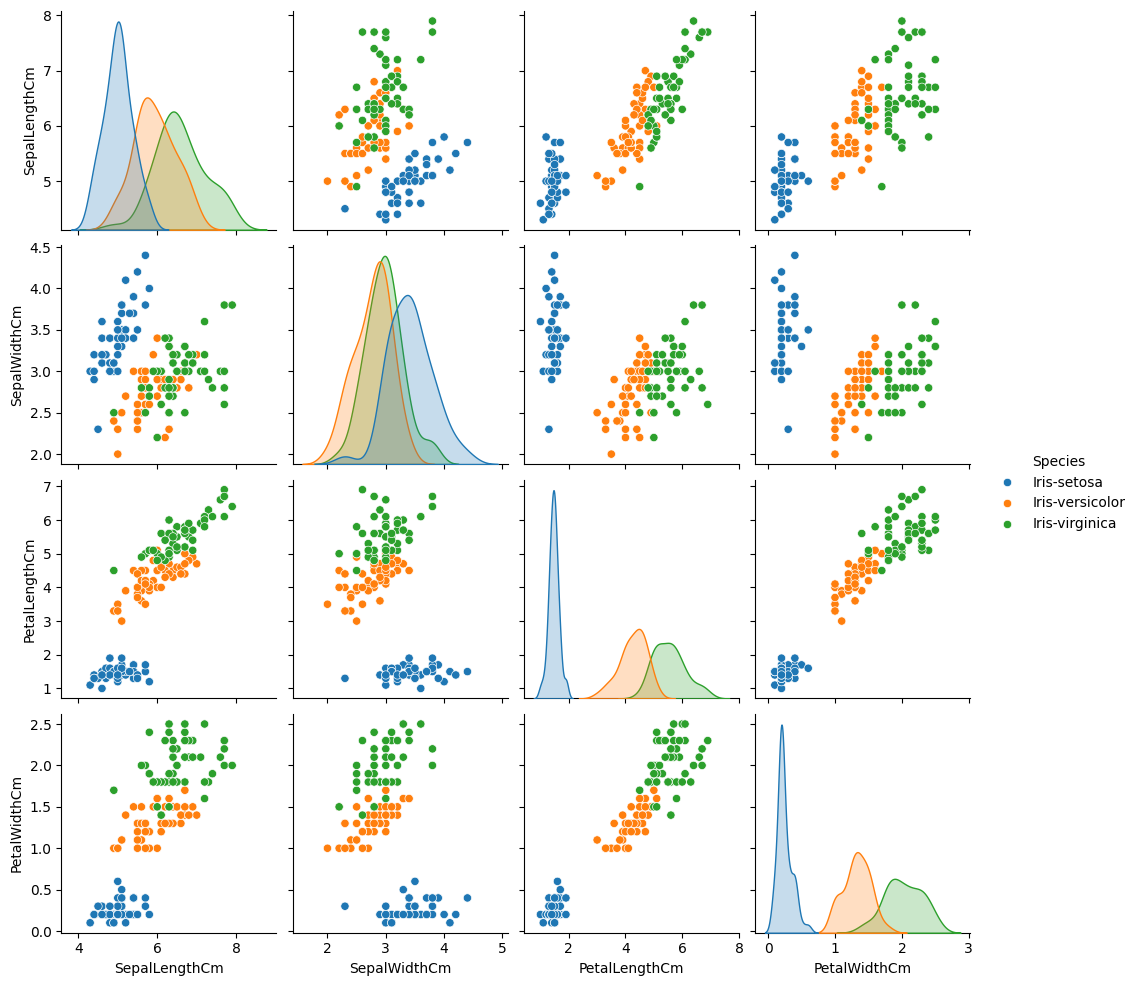

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('Iris.csv')
df.drop(columns=['Id'], inplace=True)
print(df.head())
print(df['Species'].value_counts())
sns.pairplot(df, hue="Species")
plt.show()

Step 2 – Apply k-Means Clustering

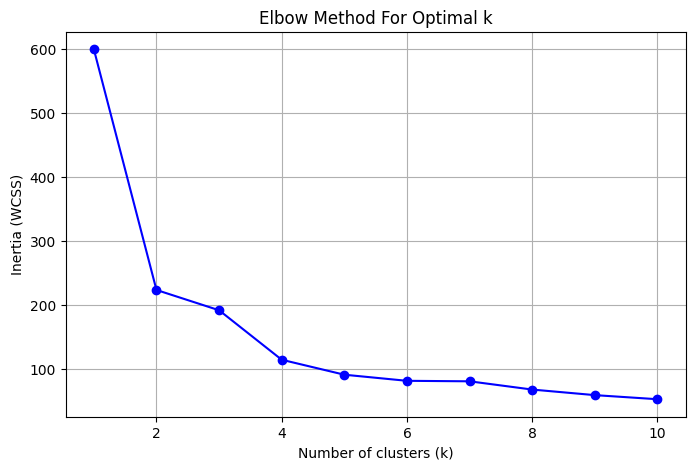

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
X = df.drop('Species', axis=1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

Step 4 - Fit k-Means with k=3 and Visualize Cluster

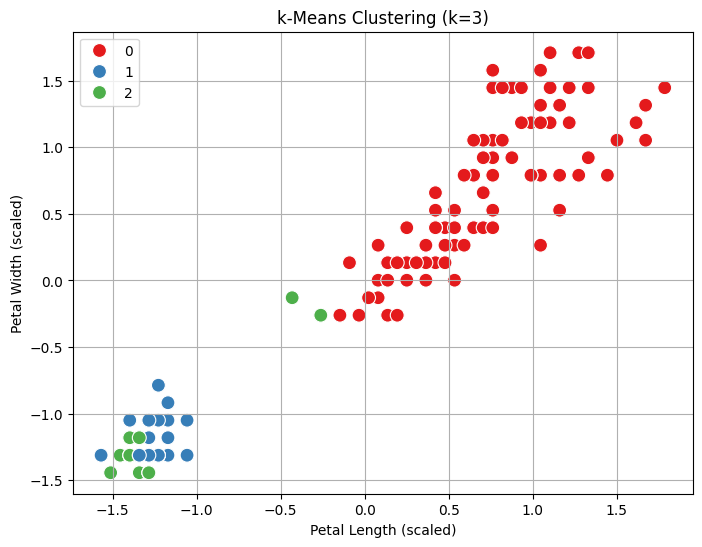

In [3]:
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
df['Cluster'] = y_kmeans
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_scaled[:, 2], y=X_scaled[:, 3],
    hue=y_kmeans, palette='Set1', s=100
)
plt.title('k-Means Clustering (k=3)')
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.grid(True)
plt.show()

Hierarchical Clustering

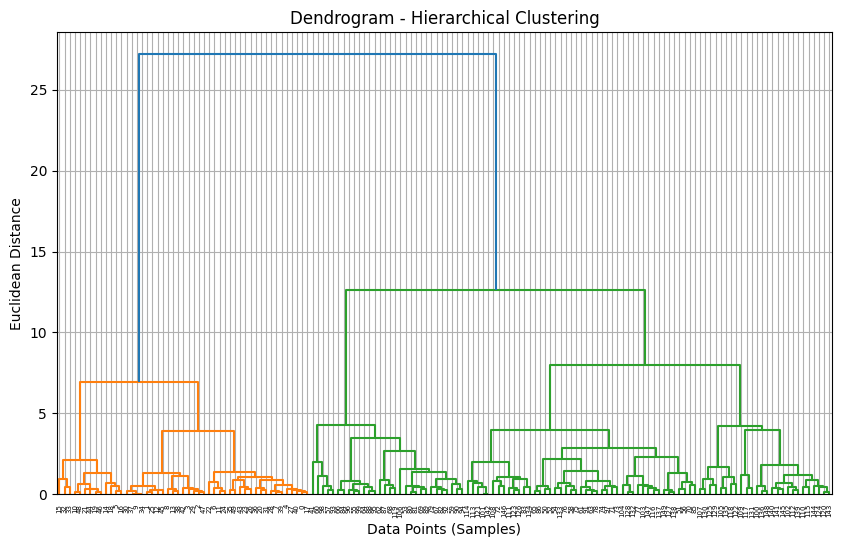

In [4]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title('Dendrogram - Hierarchical Clustering')
plt.xlabel('Data Points (Samples)')
plt.ylabel('Euclidean Distance')
plt.grid(True)
plt.show()

PCA for Dimensionality Reduction

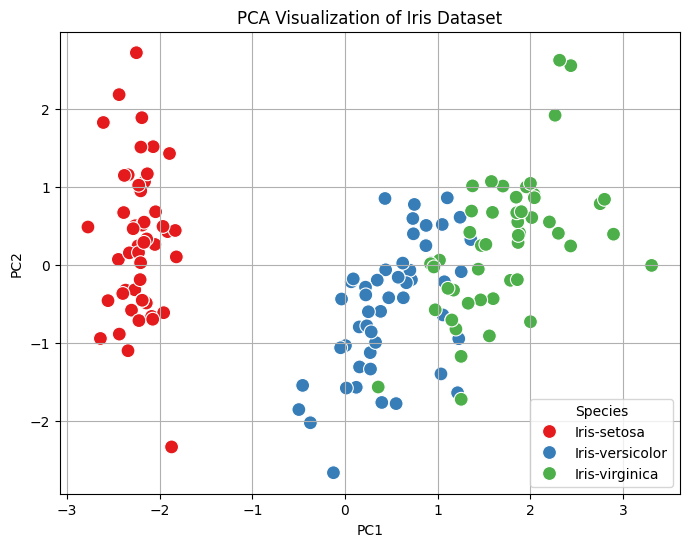

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = df['Species']
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Species', palette='Set1', s=100)
plt.title('PCA Visualization of Iris Dataset')
plt.grid(True)
plt.show()

 t-SNE Visualization

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


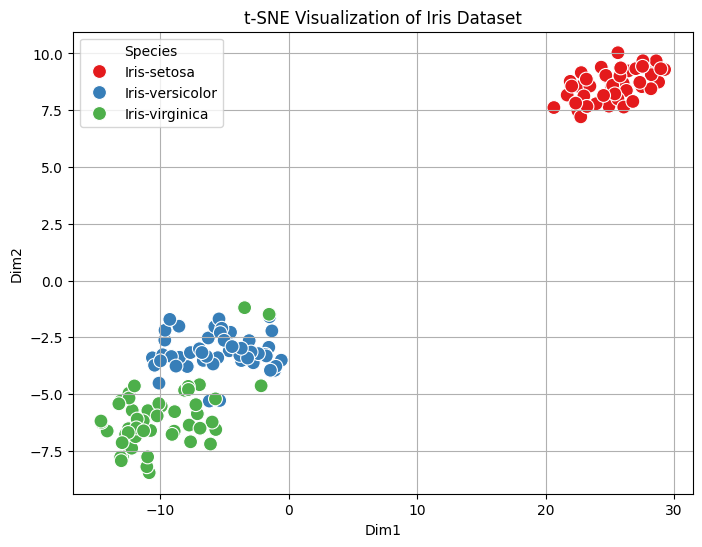

In [7]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dim1', 'Dim2'])
tsne_df['Species'] = df['Species']
plt.figure(figsize=(8, 6))
sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='Species', palette='Set1', s=100)
plt.title('t-SNE Visualization of Iris Dataset')
plt.grid(True)
plt.show()